count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: MedInc, dtype: float64
Mode: 3.125


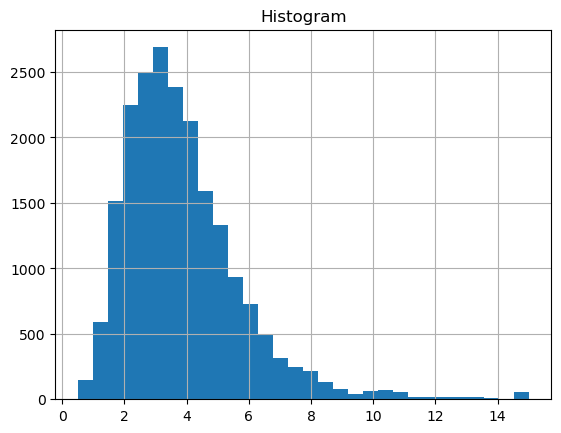

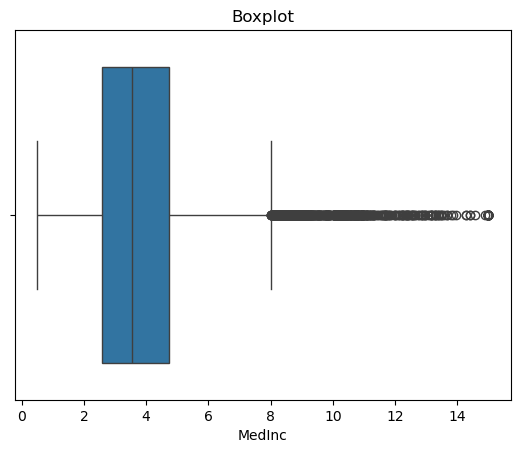

Outliers: 681


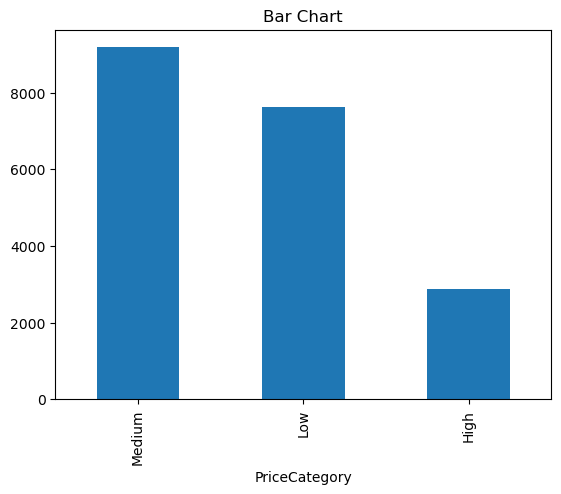

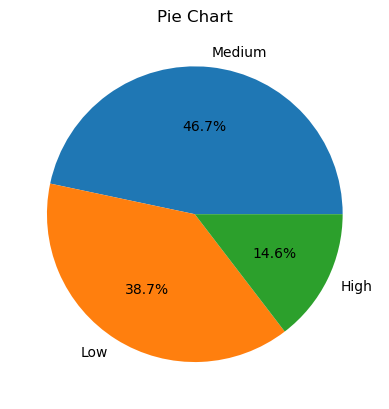

In [8]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.datasets import fetch_california_housing

# Load dataset
df = pd.DataFrame(fetch_california_housing().data, columns=fetch_california_housing().feature_names)
df['MedHouseVal'] = fetch_california_housing().target
df['PriceCategory'] = pd.cut(df['MedHouseVal'], bins=[0, 1.5, 3, 5], labels=['Low', 'Medium', 'High'])

# Numerical column analysis
col = 'MedInc'
print(df[col].describe())
print("Mode:", df[col].mode()[0])

# Histogram & boxplot
df[col].hist(bins=30); plt.title("Histogram"); plt.show()
sns.boxplot(x=df[col]); plt.title("Boxplot"); plt.show()

# Outlier detection
Q1, Q3 = df[col].quantile([0.25, 0.75])
IQR = Q3 - Q1
outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
print(f"Outliers: {len(outliers)}")

# Category frequency plots
counts = df['PriceCategory'].value_counts()
counts.plot(kind='bar'); plt.title("Bar Chart"); plt.show()
counts.plot(kind='pie', autopct='%1.1f%%'); plt.title("Pie Chart"); plt.ylabel(''); plt.show()


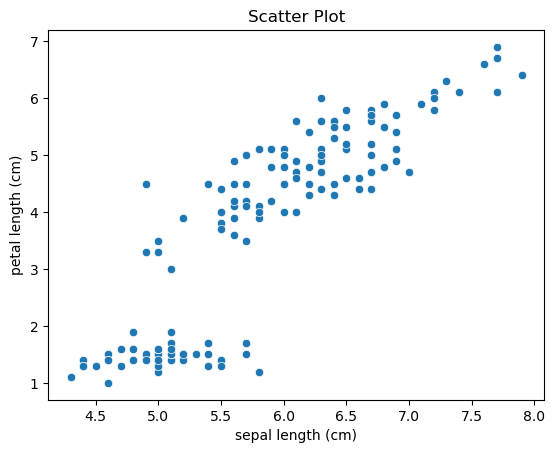

Pearson Correlation (sepal length (cm) vs petal length (cm)): 0.87

Covariance Matrix:
                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           0.685694         -0.042434           1.274315   
sepal width (cm)           -0.042434          0.189979          -0.329656   
petal length (cm)           1.274315         -0.329656           3.116278   
petal width (cm)            0.516271         -0.121639           1.295609   

                   petal width (cm)  
sepal length (cm)          0.516271  
sepal width (cm)          -0.121639  
petal length (cm)          1.295609  
petal width (cm)           0.581006  

Correlation Matrix:
                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal 

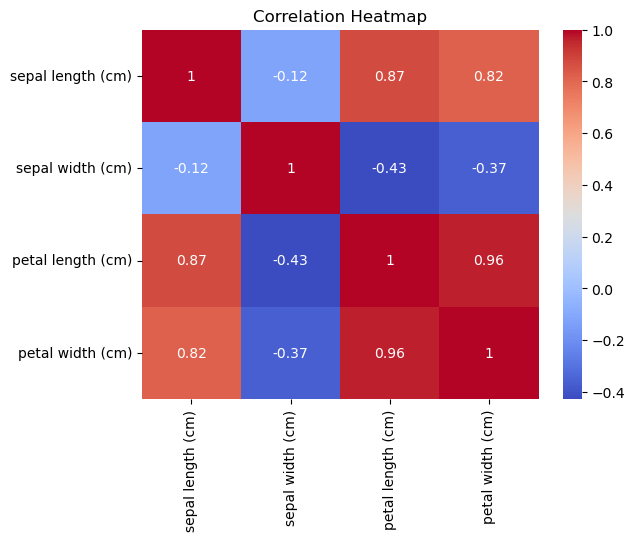

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Scatter plot of two variables
x, y = 'sepal length (cm)', 'petal length (cm)'
sns.scatterplot(x=df[x], y=df[y])
plt.title("Scatter Plot")
plt.xlabel(x)
plt.ylabel(y)
plt.show()

# Pearson correlation
corr = df[x].corr(df[y])
print(f"Pearson Correlation ({x} vs {y}): {corr:.2f}")

# Covariance matrix
print("\nCovariance Matrix:\n", df.cov())

# Correlation matrix
print("\nCorrelation Matrix:\n", df.corr())

# Heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


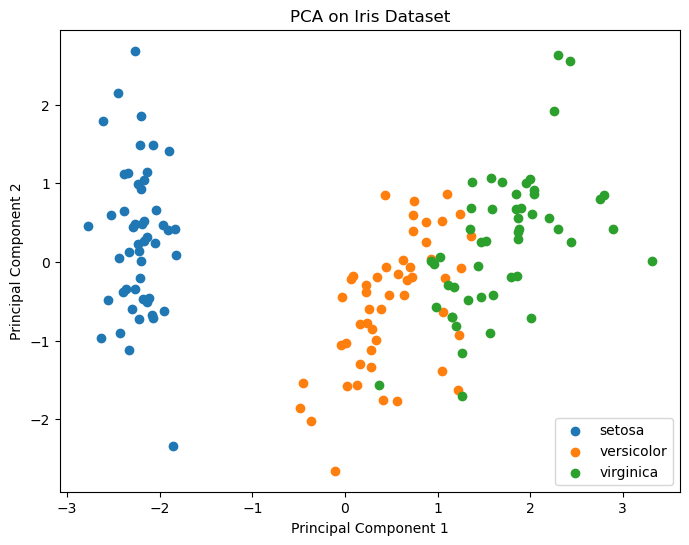

In [30]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load Iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Step 1: Standardize the data
X_scaled = StandardScaler().fit_transform(X)

# Step 2: Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Create DataFrame with PCA results
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y

# Step 4: Plot PCA result
plt.figure(figsize=(8, 6))
for label in df_pca['target'].unique():
    subset = df_pca[df_pca['target'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=data.target_names[label])
plt.title("PCA on Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


In [32]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

# Load data
data = load_iris()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Test different k values
print("== Regular k-NN ==")
for k in [1, 3, 5]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"k={k} | Accuracy: {accuracy_score(y_test, y_pred):.2f} | F1-score: {f1_score(y_test, y_pred, average='macro'):.2f}")

# Weighted k-NN: weights = 1 / distance^2
print("\n== Weighted k-NN (1/d²) ==")
for k in [1, 3, 5]:
    w_knn = KNeighborsClassifier(n_neighbors=k, weights=lambda d: 1 / (d**2 + 1e-5))  # Add small value to avoid division by zero
    w_knn.fit(X_train, y_train)
    y_pred = w_knn.predict(X_test)
    print(f"k={k} | Accuracy: {accuracy_score(y_test, y_pred):.2f} | F1-score: {f1_score(y_test, y_pred, average='macro'):.2f}")


== Regular k-NN ==
k=1 | Accuracy: 1.00 | F1-score: 1.00
k=3 | Accuracy: 1.00 | F1-score: 1.00
k=5 | Accuracy: 1.00 | F1-score: 1.00

== Weighted k-NN (1/d²) ==
k=1 | Accuracy: 1.00 | F1-score: 1.00
k=3 | Accuracy: 1.00 | F1-score: 1.00
k=5 | Accuracy: 1.00 | F1-score: 1.00


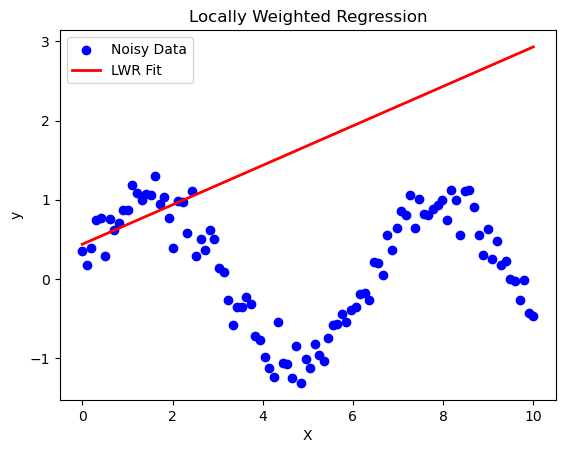

In [34]:
import numpy as np
import matplotlib.pyplot as plt
# Generate synthetic data: y = sin(x) + noise
np.random.seed(0)
X = np.linspace(0, 10, 100)
y = np.sin(X) + np.random.normal(0, 0.2, 100)
# Add intercept term
def add_intercept(X):
    return np.vstack([np.ones(len(X)), X]).T
X_design = add_intercept(X)
# Locally Weighted Linear Regression function
def lwlr_predict(x_query, X, y, tau=0.5):
    m = len(X)
    weights = np.exp(-np.sum((X - x_query)*2, axis=1) / (2 * tau*2))
    W = np.diag(weights)
     # Closed form solution: theta = (X^T W X)^-1 X^T W y
    XTWX = X.T @ W @ X
    if np.linalg.det(XTWX) == 0:
        return 0
    theta = np.linalg.inv(XTWX) @ X.T @ W @ y
    return x_query @ theta
# Predict on all points
y_pred = np.array([lwlr_predict(x, X_design, y, tau=0.3) for x in X_design])
# Plot results
plt.scatter(X, y, label='Noisy Data', color='blue')
plt.plot(X, y_pred, label='LWR Fit', color='red', linewidth=2)
plt.title('Locally Weighted Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

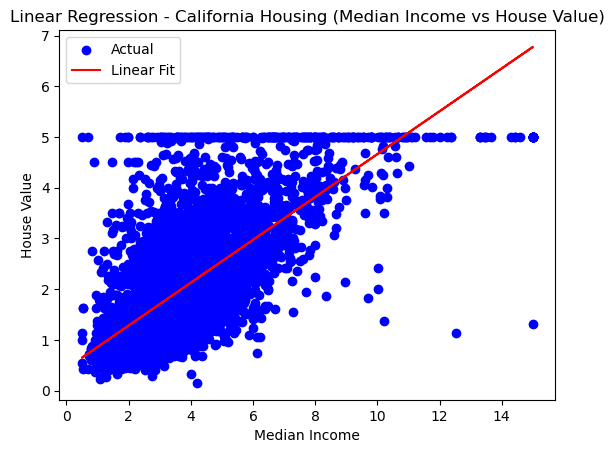

C:\Users\Harshitha\AppData\Local\Temp\ipykernel_25612\4239919457.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  auto = pd.read_csv(url, delim_whitespace=True, names=col_names, na_values='?')
C:\Users\Harshitha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


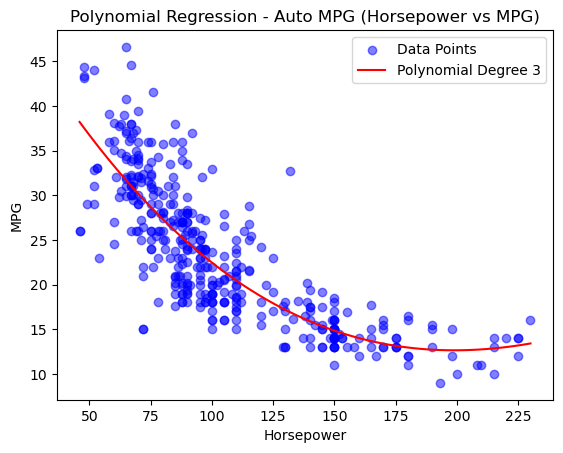

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# --- Linear Regression on California Housing ---
housing = fetch_california_housing()
X_cal = housing.data[:, 0].reshape(-1, 1)  # Use 'MedInc' feature (median income)
y_cal = housing.target

X_train, X_test, y_train, y_test = train_test_split(X_cal, y_cal, random_state=0)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Linear Fit')
plt.title('Linear Regression - California Housing (Median Income vs House Value)')
plt.xlabel('Median Income')
plt.ylabel('House Value')
plt.legend()
plt.show()

# --- Polynomial Regression on Auto MPG Dataset ---
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
col_names = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name']
auto = pd.read_csv(url, delim_whitespace=True, names=col_names, na_values='?')
auto.dropna(inplace=True)

X_auto = auto[['horsepower']].astype(float)
y_auto = auto['mpg']

X_train, X_test, y_train, y_test = train_test_split(X_auto, y_auto, random_state=0)

degree = 3
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_train, y_train)

X_curve = np.linspace(X_auto.min(), X_auto.max(), 100).reshape(-1,1)
y_curve = poly_model.predict(X_curve)

plt.scatter(X_auto, y_auto, color='blue', label='Data Points', alpha=0.5)
plt.plot(X_curve, y_curve, color='red', label=f'Polynomial Degree {degree}')
plt.title('Polynomial Regression - Auto MPG (Horsepower vs MPG)')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.show()


Accuracy: 0.6869158878504673
Precision: 0.6436781609195402
Recall: 0.6086956521739131
F1-score: 0.6256983240223464


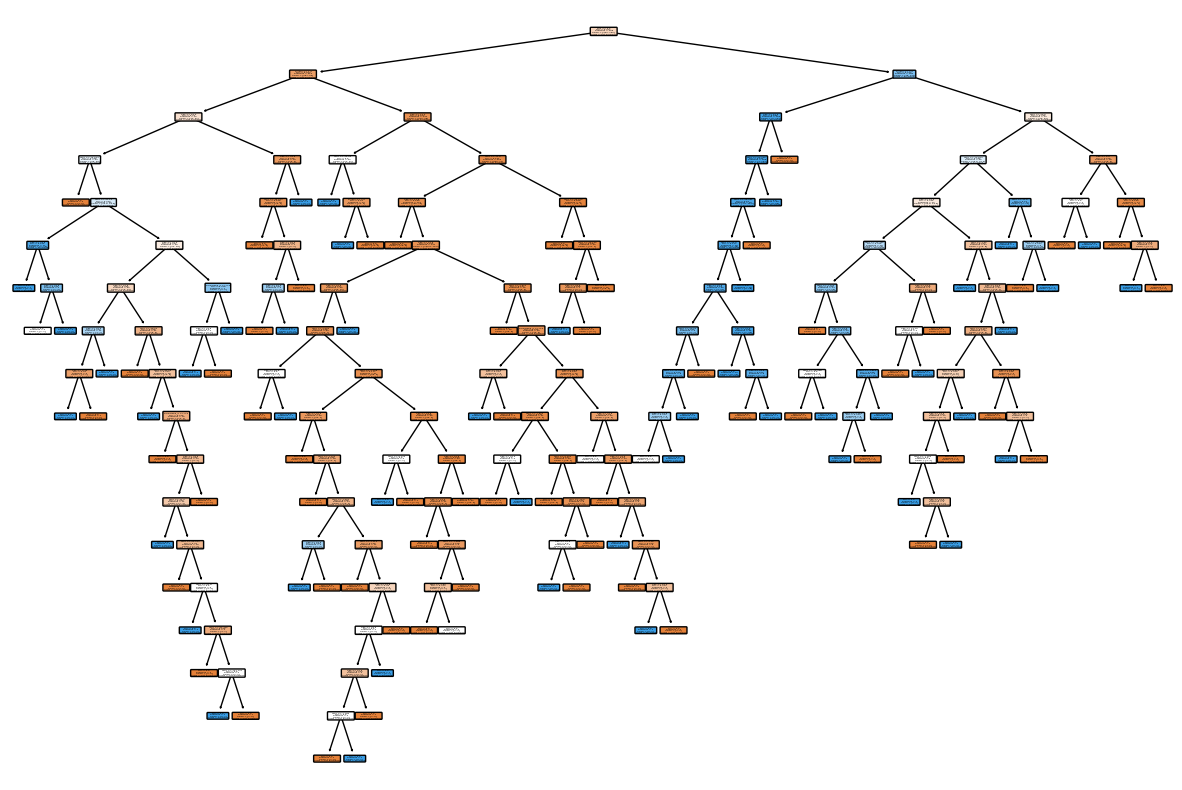

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load Titanic dataset (from seaborn for simplicity)
import seaborn as sns
titanic = sns.load_dataset('titanic')

# Basic preprocessing: Select features and target, handle missing data
features = ['pclass', 'sex', 'age', 'fare', 'embarked']
titanic = titanic[features + ['survived']].dropna()

# Encode categorical variable 'sex' and 'embarked'
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic = pd.get_dummies(titanic, columns=['embarked'], drop_first=True)

X = titanic.drop('survived', axis=1)
y = titanic['survived']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

# Visualize Decision Tree
plt.figure(figsize=(15,10))
plot_tree(clf, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True)
plt.show()


Accuracy: 1.0


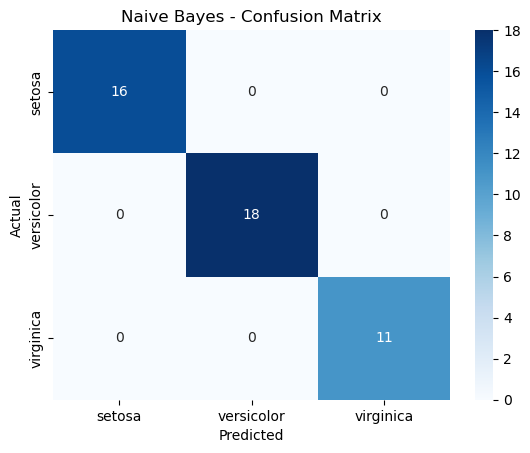

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Naive Bayes - Confusion Matrix')
plt.xlabel('Predicted'); plt.ylabel('Actual')
plt.show()




C:\Users\Harshitha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


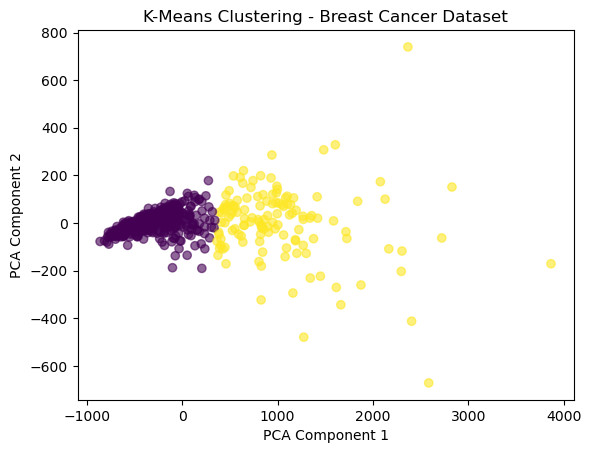

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering - Breast Cancer Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

